## POSTTEST 5(SUPERVISED LEARNING)
## SILVIA ANANDA (2009106120)
## IMPORT PACKAGE
- Pandas
- Numpy
- Matplotlib
- Scikit-Learn(Sklearn)

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

## Record File "housewares.csv"

In [22]:
df = pd.read_csv('housewares.csv')
df.head()

,Name,Variation,Body Title,Pattern,Pattern Title,DIY,Body Customize,Pattern Customize,Kit Cost,Buy,...,Interact,Tag,Outdoor,Speaker Type,Lighting Type,Catalog,Filename,Variant ID,Internal ID,Unique Entry ID
0,acoustic guitar,Natural,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_0_0,0_0,383,EpywQXABBcv2dipsP
1,acoustic guitar,Cherry,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_1_0,1_0,383,K9she5Y4SuXA8MGBR
2,acoustic guitar,Brown,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_2_0,2_0,383,vLq9iphAvALBXazDr
3,acoustic guitar,Blue,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_3_0,3_0,383,nuqeFzNE5PneqGHaj
4,acoustic guitar,White,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_4_0,4_0,383,DotFsojrhCwrLZ3TF


## Deskripsi Data

In [23]:
df.describe()

,Kit Cost,Sell,Miles Price,Internal ID
count,2239.000000,3275.000000,115.000000,3275.000000
mean,3.263064,4011.301985,2514.782609,3605.981679
std,3.493774,13823.831987,1275.975270,2379.456027
min,1.000000,20.000000,1000.000000,80.000000
25%,1.000000,575.000000,2000.000000,1645.000000
50%,2.000000,1250.000000,2000.000000,3500.000000
75%,4.000000,2400.000000,3000.000000,4081.000000
max,50.000000,250000.000000,5000.000000,12437.000000


## Info Data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3275 non-null   object 
 1   Variation          3074 non-null   object 
 2   Body Title         1182 non-null   object 
 3   Pattern            1508 non-null   object 
 4   Pattern Title      1508 non-null   object 
 5   DIY                3275 non-null   object 
 6   Body Customize     3275 non-null   object 
 7   Pattern Customize  3275 non-null   object 
 8   Kit Cost           2239 non-null   float64
 9   Buy                3275 non-null   object 
 10  Sell               3275 non-null   int64  
 11  Color 1            3275 non-null   object 
 12  Color 2            3275 non-null   object 
 13  Size               3275 non-null   object 
 14  Miles Price        115 non-null    float64
 15  Source             3275 non-null   object 
 16  Source Notes       1870 

## Korelasi Data

In [25]:
df.corr()

,Kit Cost,Sell,Miles Price,Internal ID
Kit Cost,1.000000,0.894864,NaN,-0.047298
Sell,0.894864,1.000000,1.000000,-0.061604
Miles Price,NaN,1.000000,1.000000,-0.147812
Internal ID,-0.047298,-0.061604,-0.147812,1.000000


In [26]:
df.isna().sum()

Name                    0
Variation             201
Body Title           2093
Pattern              1767
Pattern Title        1767
DIY                     0
Body Customize          0
Pattern Customize       0
Kit Cost             1036
Buy                     0
Sell                    0
Color 1                 0
Color 2                 0
Size                    0
Miles Price          3160
Source                  0
Source Notes         1405
Version                 0
HHA Concept 1           0
HHA Concept 2           0
HHA Series              0
HHA Set                 0
Interact                0
Tag                     0
Outdoor                 0
Speaker Type            0
Lighting Type           0
Catalog                 0
Filename                0
Variant ID            122
Internal ID             0
Unique Entry ID         0
dtype: int64

## Data Cleaning

In [51]:
dataset_ns = df.copy()

In [52]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

Modus

In [53]:
df.isna().sum()

Name                    0
Variation             201
Body Title           2093
Pattern              1767
Pattern Title        1767
DIY                     0
Body Customize          0
Pattern Customize       0
Kit Cost             1036
Buy                     0
Sell                    0
Color 1                 0
Color 2                 0
Size                    0
Miles Price          3160
Source                  0
Source Notes         1405
Version                 0
HHA Concept 1           0
HHA Concept 2           0
HHA Series              0
HHA Set                 0
Interact                0
Tag                     0
Outdoor                 0
Speaker Type            0
Lighting Type           0
Catalog                 0
Filename                0
Variant ID            122
Internal ID             0
Unique Entry ID         0
dtype: int64

In [54]:
dfmodus = df.copy()

In [55]:
dfmodus['Variation'] = imputer_modus.fit_transform(dfmodus[['Variation']])
dfmodus['Body Title'] = imputer_modus.fit_transform(dfmodus[['Body Title']])
dfmodus['Pattern'] = imputer_modus.fit_transform(dfmodus[['Pattern']])
dfmodus['Pattern Title'] = imputer_modus.fit_transform(dfmodus[['Pattern Title']])
dfmodus['Source Notes'] = imputer_modus.fit_transform(dfmodus[['Source Notes']])
dfmodus['Variant ID'] = imputer_modus.fit_transform(dfmodus[['Variant ID']])

dfmodus.isna().sum()

Name                    0
Variation               0
Body Title              0
Pattern                 0
Pattern Title           0
DIY                     0
Body Customize          0
Pattern Customize       0
Kit Cost             1036
Buy                     0
Sell                    0
Color 1                 0
Color 2                 0
Size                    0
Miles Price          3160
Source                  0
Source Notes            0
Version                 0
HHA Concept 1           0
HHA Concept 2           0
HHA Series              0
HHA Set                 0
Interact                0
Tag                     0
Outdoor                 0
Speaker Type            0
Lighting Type           0
Catalog                 0
Filename                0
Variant ID              0
Internal ID             0
Unique Entry ID         0
dtype: int64

In [56]:
dfmodus['Kit Cost'] = imputer_mean.fit_transform(dfmodus[['Kit Cost']])
dfmodus['Miles Price'] = imputer_mean.fit_transform(dfmodus[['Miles Price']])

dfmodus.isna().sum()

Name                 0
Variation            0
Body Title           0
Pattern              0
Pattern Title        0
DIY                  0
Body Customize       0
Pattern Customize    0
Kit Cost             0
Buy                  0
Sell                 0
Color 1              0
Color 2              0
Size                 0
Miles Price          0
Source               0
Source Notes         0
Version              0
HHA Concept 1        0
HHA Concept 2        0
HHA Series           0
HHA Set              0
Interact             0
Tag                  0
Outdoor              0
Speaker Type         0
Lighting Type        0
Catalog              0
Filename             0
Variant ID           0
Internal ID          0
Unique Entry ID      0
dtype: int64

In [59]:
df.isna().sum()

Name                    0
Variation             201
Body Title           2093
Pattern              1767
Pattern Title        1767
DIY                     0
Body Customize          0
Pattern Customize       0
Kit Cost             1036
Buy                     0
Sell                    0
Color 1                 0
Color 2                 0
Size                    0
Miles Price          3160
Source                  0
Source Notes         1405
Version                 0
HHA Concept 1           0
HHA Concept 2           0
HHA Series              0
HHA Set                 0
Interact                0
Tag                     0
Outdoor                 0
Speaker Type            0
Lighting Type           0
Catalog                 0
Filename                0
Variant ID            122
Internal ID             0
Unique Entry ID         0
dtype: int64

## Exploratory Data Analysis(EDA)

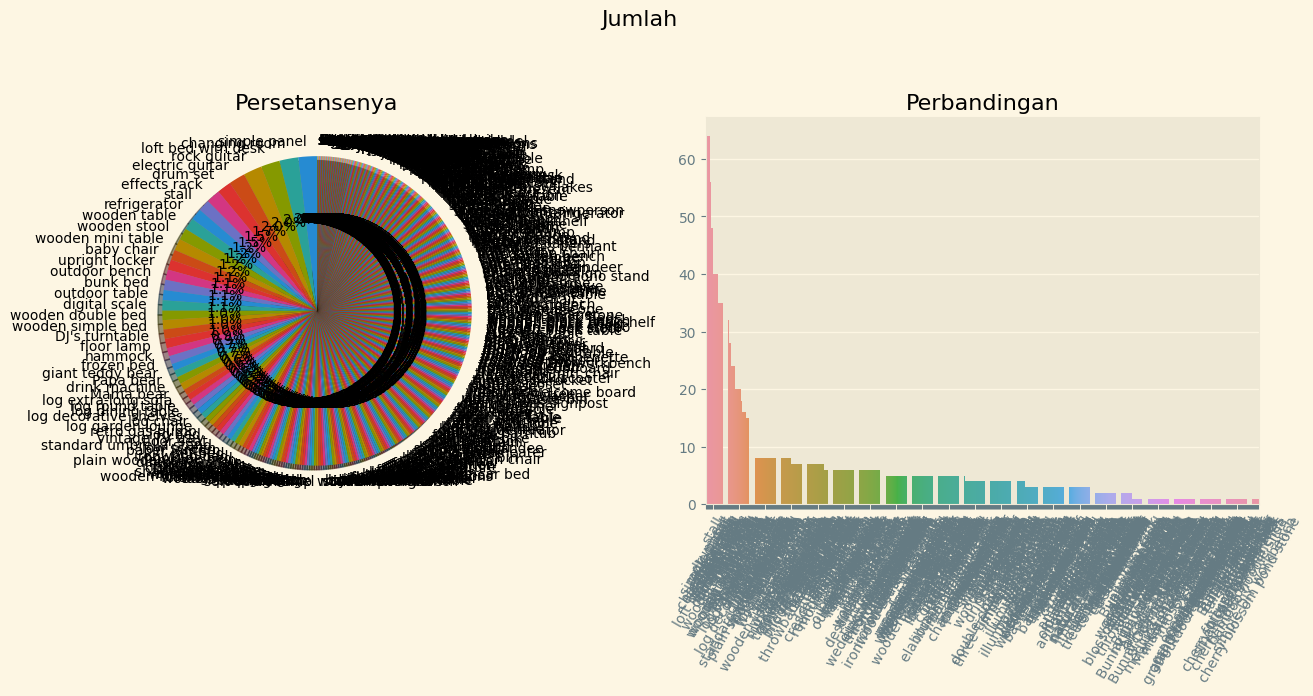

In [65]:
plt.style.use('Solarize_Light2')

Kategori = df["Name"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(pad=5.0)

ax[0].pie(Kategori['Name'],labels=Kategori['index'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("Persetansenya")


X_index = list(Kategori['index'])
y_species = list(Kategori['Name'])
sns.barplot(x=X_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan")

fig.subplots_adjust(top=0.8)
plt.xticks(rotation=60)
plt.suptitle("Jumlah",size=16)
plt.show()

<Figure size 2000x1500 with 0 Axes>

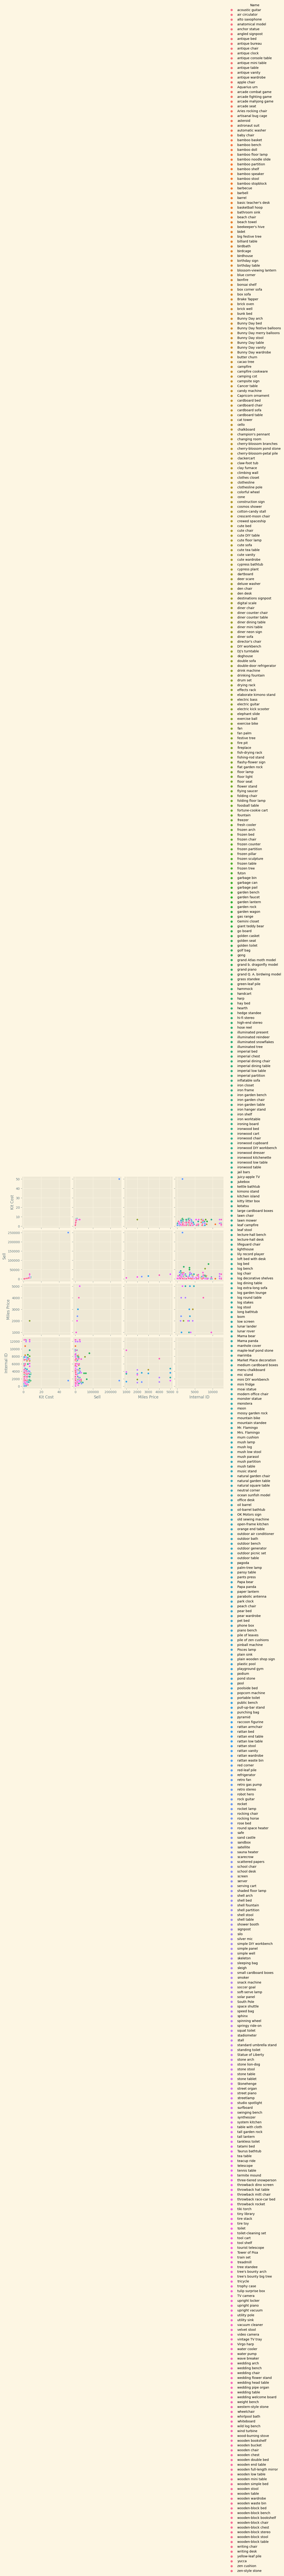

In [68]:
plt.figure(figsize=(20,15))
sns.pairplot(df,hue="Name")
plt.show()

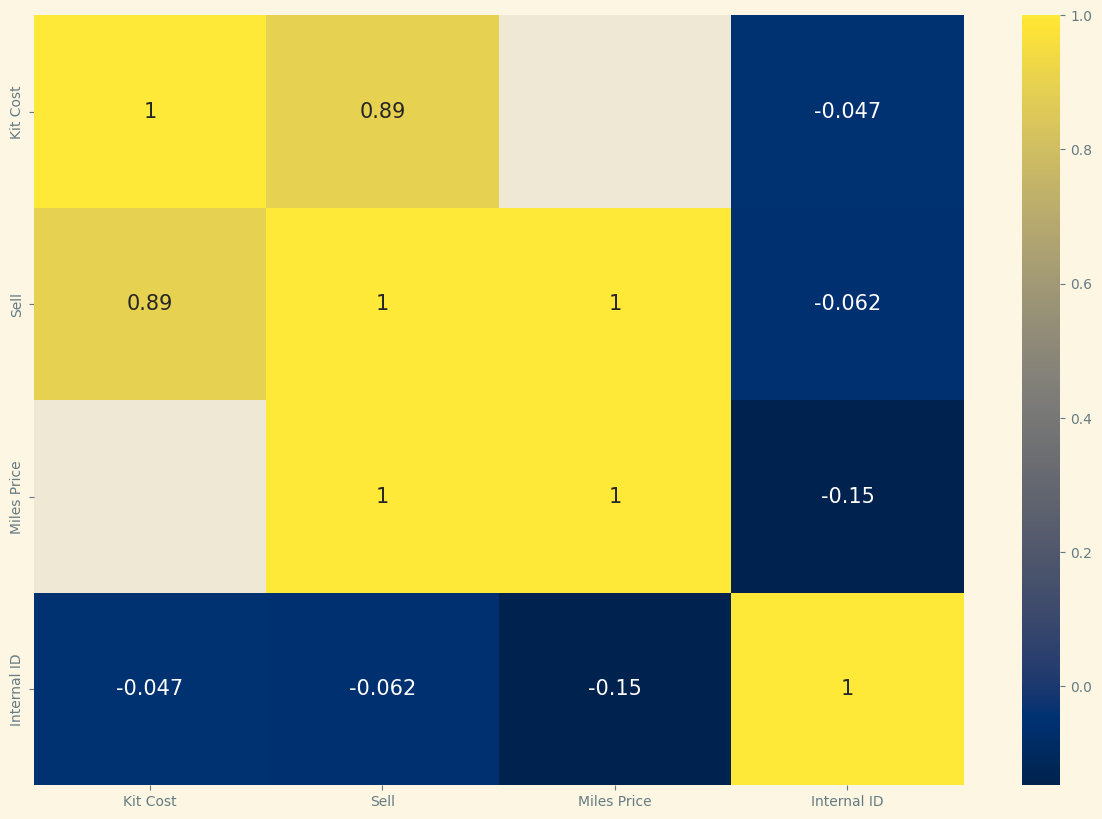

In [69]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),cmap='cividis',annot=True,annot_kws={"size":15})
plt.show()

## Data Split

In [71]:
data = df[['Sell']]
label = df['Internal ID']

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.3)

## K-Nearest Neighbour (KNN)
K-Nearest Neighbour atau algoritma KNN menggunakan algoritma non-parametrik yang mengelompokkan poin data berdasarkan kedekatan dan juga asosiasi mereka dengan data lain. Algoritma KNN mengasumsikan bahwa titik data yang serupa akan selalu bisa ditemukan di sekitarnya. Konsekuensinya, algoritma ini pun selalu berupaya untuk menghitung jarak antar titik data (biasanya dengan Euclidean distance) dan kemudian menentukan kategori berdasarkan jenis yang paling sering muncul. KNN ini disukai banyak ilmuwan data atau data scientists. Sebab, penggunaannya relatif mudah dan waktu perhitungannya pun cukup rendah. Namun, saat terus dilakukan uji dataset, waktu pemrosesan pun menjadi semakin lama. Oleh karena itu, KNN lebih sering dimanfaatkan untuk recommendation system dan image recognition.

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data_train,label_train)

KNeighborsClassifier()

In [73]:
predict_label = knn.predict(data_test)

In [74]:
akurasi = accuracy_score(label_test, predict_label)

In [75]:
print("Akurasi algoritma KNN dengan default paramater :", {akurasi})

Akurasi algoritma KNN dengan default paramater : {0.4669379450661241}


## Decision Tree
Decision Tree adalah sebuah tipe model yang digunakan untuk Supervised Learning. Decision Tree dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi, namun lebih sering digunakan untuk masalah klasifikasi. Decision Tree memiliki bentuk seperti pohon, dimana tree memiliki node akar (root node), decision node dan node daun (leaf node). Leaf node adalah node akhir yang tidak dapat dipecah dan yang akan menentukan hasil prediksi decision tree. Decision Tree bekerja dengan melakukan klasifikasi berdasarkan atribut yang paling membedakan. Algoritma decision tree akan dimulai pada node akar, kemudian akan melakukan perbandingan antara nilai yang ada pada dataset dan data yang ingin diprediksi. Berdasarkan perbandingan tersebut, algoritma akan turun ke bawah dan melanjutkan ke sub-node yang lebih dalam. Algoritma ini akan berulang hingga mencapai leaf node, dimana keputusan prediksi bisa dibuat.

In [76]:
dt = DecisionTreeClassifier()
dt.fit(data_train, label_train)

DecisionTreeClassifier()

In [77]:
predict_label = dt.predict(data_test)

In [78]:
akurasi = accuracy_score(label_test, predict_label)

In [79]:
print("Akurasi algoritma Decision Tree dengan default paramater :", {akurasi})

Akurasi algoritma Decision Tree dengan default paramater : {0.5940996948118006}


## Naive Bayes
Berikutnya ada Naïve Bayes, yang mengadopsi prinsip kemandirian kelas bersyarat dari Teorema Bayes. Dalam prinsip tersebut, ada tidaknya satu elemen tidak akan memengaruhi komponen lain dalam probabilitas hasil yang akan diberikan, dengan predictor yang mendapatkan efek yang sama.

In [80]:
gnb  = GaussianNB()
gnb.fit(data_train,label_train)

GaussianNB()

In [81]:
predict_label = gnb.predict(data_test)

In [82]:
akurasi = accuracy_score(label_test, predict_label)

In [83]:
print("Akurasi algoritma Naive Bayes dengan default paramater :", {akurasi})

Akurasi algoritma Naive Bayes dengan default paramater : {0.5940996948118006}


## Support Vector Machine(SVM)
Support Vector Machine atau sering disingkat SVM merupakan metode algoritma Supervised Learning yang dikembangkan oleh Vladimir Vapnik. Metode ini biasanya digunakan dalam data classification dan juga regression.

In [84]:
svc = SVC()
svc.fit(data_train,label_train)

SVC()

In [85]:
predict_label = svc.predict(data_test)

In [86]:
akurasi = accuracy_score(label_test, predict_label)

In [87]:
print("Akurasi algoritma SVC dengan default paramater :", {akurasi})

Akurasi algoritma SVC dengan default paramater : {0.06307222787385554}


## REGRESI DATA
Regresi digunakan ketika variabel keluaran (output) bernilai real atau kontinyu. Pada kasus ini, terdapat hubungan antara dua variabel atau lebih misalnya suatu variabel berubah apabila ada perubahan dengan variabel lainnya.

Split Data

In [90]:
data, label = datasets.load_diabetes(return_X_y=True)
data = data[:, np.newaxis, 2]

data_train2 = data[:-50]
data_test2 = data[-50:]

label_train2 = label[:-50]
label_test2 = label[-50:]

## Linear Regresion
Algoritma supervised learning yang satu ini biasanya digunakan dalam identifikasi hubungan antara variabel dependen dengan satu (atau lebih) variabel independen. Identifikasi tersebut kemudian digunakan untuk memprediksi hasil di masa depan. Jika hanya ada satu variabel dependen dan satu variabel independen, maka disebut dengan simple Regresi Linear. Namun, jika terdapat banyak variabel sekaligus, disebut dengan istilah multiple Regresi Linear.

In [91]:
reg = LinearRegression()
reg.fit(data_train2,label_train2)

LinearRegression()

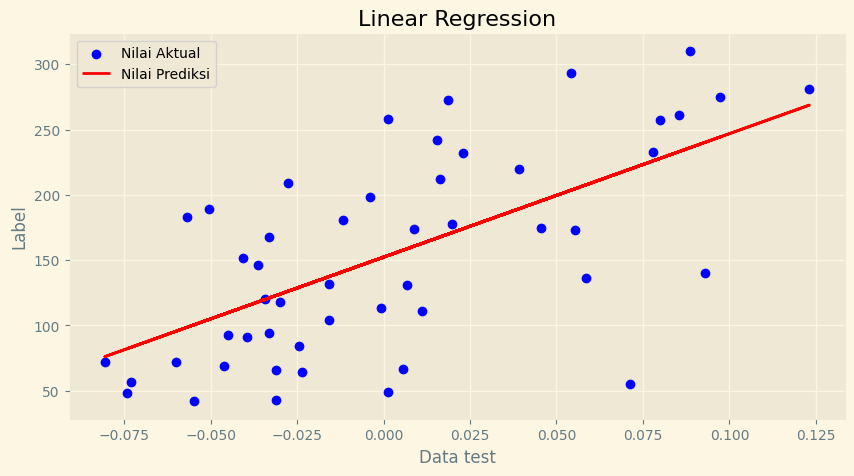

In [92]:
predict_label = reg.predict(data_test2)

plt.figure(figsize=(10,5))

plt.scatter(data_test2, label_test2, color="blue",label="Nilai Aktual")
plt.plot(data_test2, predict_label, color="red",label="Nilai Prediksi")
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('Label')
plt.legend(loc ='upper left')
plt.show()